# Lab 2: The Mine Crafting

In [87]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.integrate import quad
from scipy.integrate import solve_ivp 
import math

# constants
G = 6.6743E-11 #m^3/kg/s^2
g0 = 9.81 #m/s^2
me = 5.972E24 #kg
mm = 7.35E22 #kg
re = 6.3781e6
rm = 1.7381e6 #km
rre = 7.272E5 #rad/s

## Part 1

### Part A
$y = \frac{1}{2} g t^2$

$t = \sqrt{\frac{2y}{g}} = \sqrt{\frac{2 * 4000}{9.81}} = 28.56s$

### Part B
$\frac{dy}{dt} = v$

$\frac{dv}{dt} = -g + \alpha v^\gamma$

Analytic solution: 28.556862 seconds
Numerical Solution: 28.556862 seconds
The analytic and numerical solutions are very similar, as expected.


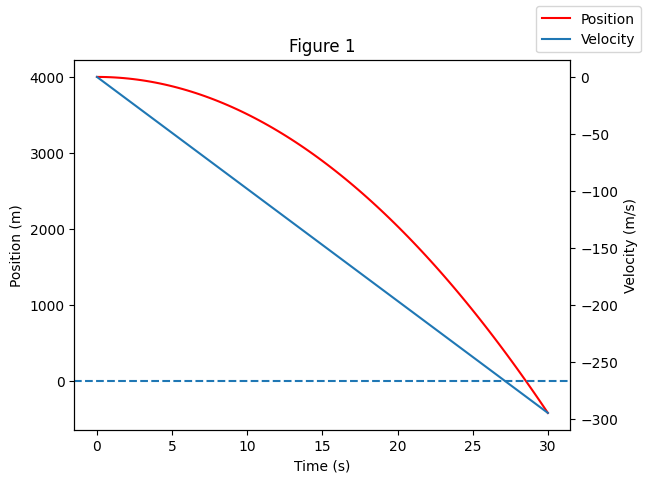

In [ ]:
# Analytic solution (no drag)
def analytic_solution(y):
    return np.sqrt(2 * y / g0)

analytic = analytic_solution(4000)
print(f'Analytic solution: {analytic:.6f} seconds')

def equation(t,d,a,g0,gamma):
    y,v = d
    dydt = v
    dvdt = -g0+a*(v**gamma)
    return [dydt,dvdt] 


def endpoint(t,d,a,g0,gamma):
    y,v = d
    return y
sol = solve_ivp(equation, (0,30), [4000,0], args=(0,g0,2), t_eval = np.linspace(0,30,101),events=endpoint)

y = sol.y[0] 
v = sol.y[1] 
t = sol.t 

fig,ax = plt.subplots() 
ax1 = ax.twinx() 
ax.plot(t,y,'red',label='Position') 
ax1.plot(t,v,label='Velocity') 
ax.axhline(0.0,linestyle='--')
ax.set_xlabel("Time (s)") 
ax.set_ylabel("Position (m)") 
ax1.set_ylabel("Velocity (m/s)")
ax.set_title("Figure 1")
fig.legend()

numerical = sol.t_events[0][0] 
print(f"Numerical Solution: {numerical:.6f} seconds") 
print("The analytic and numerical solutions are very similar, as expected.")

## Part 2

Making gravity height-dependent makes the solution 28.556864 seconds
This solution is slightly higher than the solution calculated earlier, 
that was 28.556862 seconds. Likely since the g value increases as y
increases, resulting in slower change in velocity


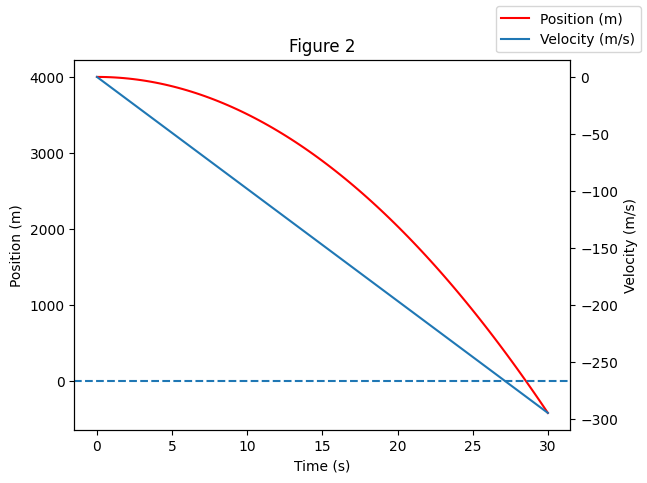

In [89]:
def radEquation(t,d,a,g0,gamma,r):
    y,v = d
    dydt = v
    g = (g0 * ((r+y-4000)/r))
    dvdt = -g+a*(v**gamma)
    return [dydt,dvdt] 

def endpoint(t,d,a,g0,gamma,r):
    y,v = d
    return y

sol = solve_ivp(radEquation, (0,30), [4000,0], args = (0,g0,2,re*1000),t_eval=np.linspace(0,30,101),events = endpoint)

y = sol.y[0]
v = sol.y[1]
t = sol.t

fig, ax = plt.subplots()
ax.plot(t,y,'red', label = "Position (m)")
ax1 = ax.twinx()
ax1.plot(t,v,label = "Velocity (m/s)")

ax.set_xlabel("Time (s)")
ax.set_ylabel("Position (m)")
ax1.set_ylabel("Velocity (m/s)")
ax.set_title("Figure 2")

ax.axhline(0.0,linestyle='--')
fig.legend()

solution = sol.t_events[0][0]
print(f"Making gravity height-dependent makes the solution {solution:.6f} seconds")
print(f"This solution is slightly higher than the solution calculated earlier, \nthat was {numerical:.6f} seconds. Likely since the g value increases as y\nincreases, resulting in slower change in velocity")

Making alpha more relativistic results in the solution being 84.266801 seconds, 
which is much larger than the original value calculated with no drag. The time 
calculated increases exponentially as alpha increases.


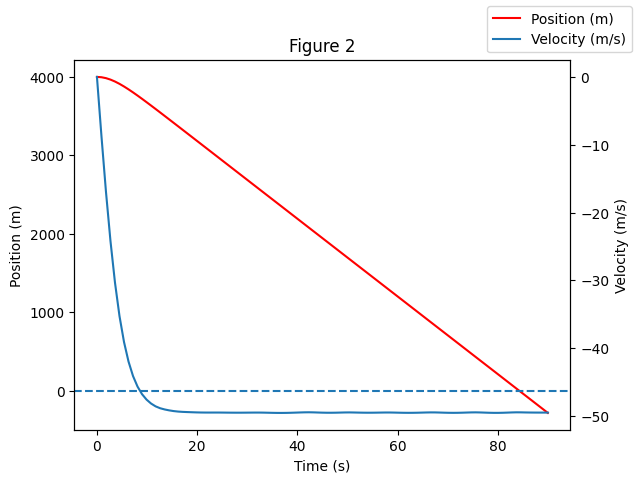

In [90]:
sol = solve_ivp(radEquation, (0,90), [4000,0], args = (0.004,g0,2,re*1000),t_eval=np.linspace(0,90,101),events = endpoint)

y = sol.y[0]
v = sol.y[1]
t = sol.t

fig, ax = plt.subplots()
ax.plot(t,y,'red', label = "Position (m)")
ax1 = ax.twinx()
ax1.plot(t,v,label='Velocity (m/s)')

ax.set_xlabel("Time (s)")
ax.set_ylabel("Position (m)")
ax1.set_ylabel("Velocity (m/s)")
ax.set_title("Figure 2")

ax.axhline(0.0,linestyle='--')
fig.legend()

solution = sol.t_events[0][0]
print(f"Making alpha more relativistic results in the solution being {solution:.6f} seconds, \nwhich is much larger than the original value calculated with no drag. The time \ncalculated increases exponentially as alpha increases.")

## Part 3

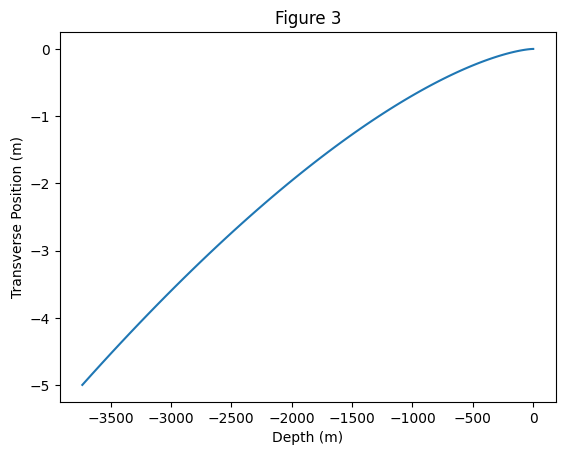

In [ ]:
def omegaEquation(t,d,a,g0,gamma,Re,omega):
    yx,yy,vx,vy = d
    dyxdt = vx 
    dyydt = vy
    g = (g0*((Re+yy-4000)/Re)) 
    dvxdt = 2*omega*vy 
    dvydt = -g+a*(np.abs(vy)**gamma) - 2*omega*vx 
    return [dyxdt,dyydt,dvxdt,dvydt] 

omega  = 7.272e-5 
def endpoint(t,d,a,g0,gamma,Re,omega):
    yx,yy,vx,vy = d
    return yx 

def bottom(t,d,a,g0,gamma,Re,omega):
    yx,yy,vx,vy = d
    return yy-4000

def wall(t,d,a,g0,gamma,Re,omega):
    yx,yy,vx,vy = d
    return yx +5 

bottom.terminal = True 
wall.terminal = True 

sol = solve_ivp(omegaEquation, (0,30), [0,0,0,0], args=(0,g0,2,re,omega), t_eval = np.linspace(0,30,101),events=[bottom,wall]) 
yx,yy,vx,vy = sol.y[0],sol.y[1],sol.y[2],sol.y[3]
t = sol.t 

fig,ax = plt.subplots() 
ax.plot(yy,yx) 
ax.set_xlabel("Depth (m)") 
ax.set_ylabel("Transverse Position (m)") 
ax.set_title("Figure 3") 


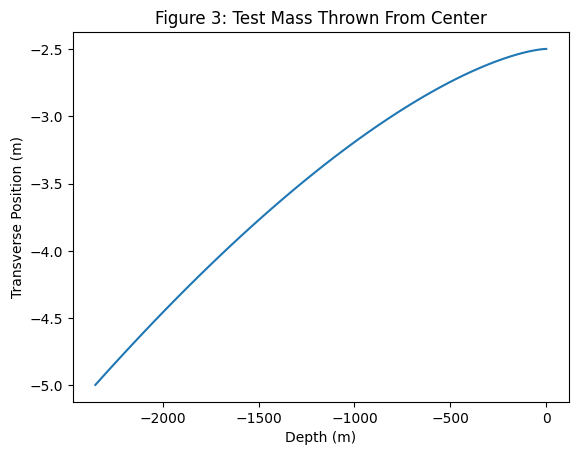

In [ ]:
sol = solve_ivp(omegaEquation, (0,30), [-2.5,0,0,0], args=(0,g0,2,re,omega), t_eval = np.linspace(0,30,101),events=[bottom,wall])  
yx,yy,vx,vy = sol.y[0],sol.y[1],sol.y[2],sol.y[3]
t = sol.t 
fig,ax = plt.subplots() 
ax.plot(yy,yx) 
ax.set_xlabel("Depth (m)") 
ax.set_ylabel("Transverse Position (m)") 
ax.set_title("Figure 3: Test Mass Thrown From Center") 

In [93]:
print("The test mass hits the wall before hitting the bottom of the shaft")

The test mass hits the wall before hitting the bottom of the shaft


Turning on drag results in the mass hitting the wall even sooner.


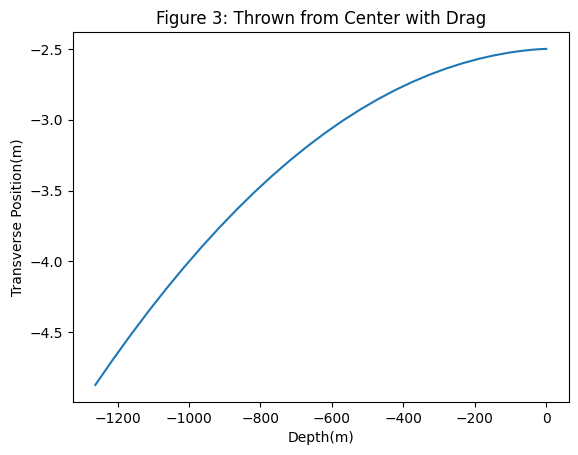

In [94]:
sol = solve_ivp(omegaEquation, (0,100), [-2.5,0,0,0], args=(0.004,g0,2,re,omega), t_eval = np.linspace(0,100,101),events=[bottom,wall])  
yx,yy,vx,vy = sol.y[0],sol.y[1],sol.y[2],sol.y[3]

t = sol.t 
fig,ax = plt.subplots() 
ax.plot(yy,yx,) 
ax.set_xlabel("Depth(m)") 
ax.set_ylabel("Transverse Position(m)") 
ax.set_title("Figure 3: Thrown from Center with Drag") 

print("Turning on drag results in the mass hitting the wall even sooner.")

## Part 4

[array([1266.47346956, 3798.79582661])]


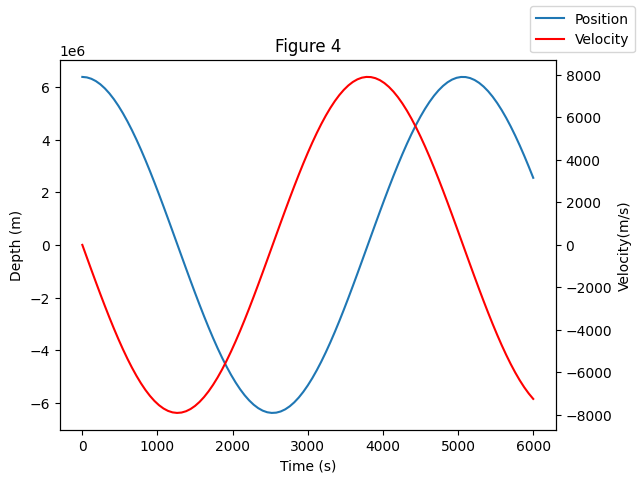

In [95]:
def dragEq(t,s,a,g0,gamma,Re):
    y,v = s
    dydt = v
    g = (g0*(y/Re)) 
    dvdt = -g+a*(v**gamma)
    return [dydt,dvdt] 

def endpoint(t,d,a,g0,gamma,Re):
    y,v = d
    return y

soln = solve_ivp(dragEq,(0,6000), [re,0], args=(0,g0,2,re),t_eval = np.linspace(0,6000,101),events=[endpoint])
y,v = soln.y
t = soln.t 
print(soln.t_events)
fig,ax = plt.subplots() 
ax.plot(t,y,label="Position") 
ax.set_xlabel("Time (s)") 
ax.set_ylabel("Depth (m)") 
ax1 = ax.twinx() 
ax1.plot(t,v,'red',label="Velocity")
ax1.set_ylabel("Velocity(m/s)")
ax.set_title("Figure 4")
fig.legend() 

$\frac{v^2}{R} = \frac{GM}{R^2}$ 

$v = \sqrt{\frac{GM}{R}}$ 

$G = 6.6743 * 10^{-11} m^3/kg/s^2$

$R = 6.3781 * 10^6 m$  

$M = 5.972 * 10^{24} kg$ 

$v = 7.9052 * 10^3 m/s$

$T = \frac{2\pi R_e}{v}$ 
$T = 5069.42s$

## Part 5

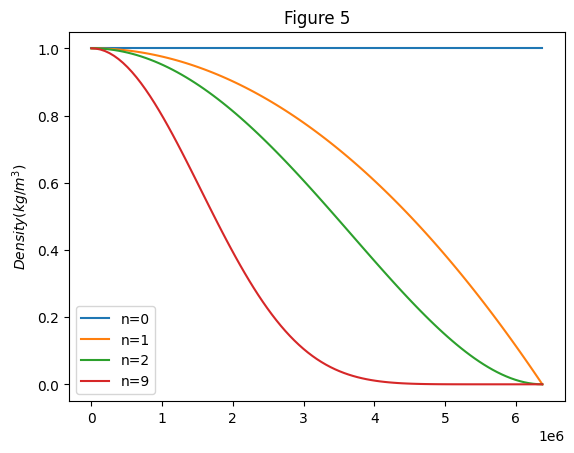

In [ ]:
#Part(a)
def density(r,i,R,p):
    p = p*((1-(r/R)**2)**i)
    return p 


fig,ax = plt.subplots()
n = [0,1,2,9]
labels = ["n=0","n=1","n=2","n=9"]
for a in [0,1,2,3]:
    dense = density(np.linspace(0,re,101),n[a],re,1)
    ax.plot(np.linspace(0,re,101),dense,label=labels[a]) 

ax.legend()
ax.set_label("Radius (m)") 
ax.set_ylabel("$Density (kg/m^3)$") 
ax.set_title("Figure 5")

Text(0.5, 1.0, 'Figure 6')

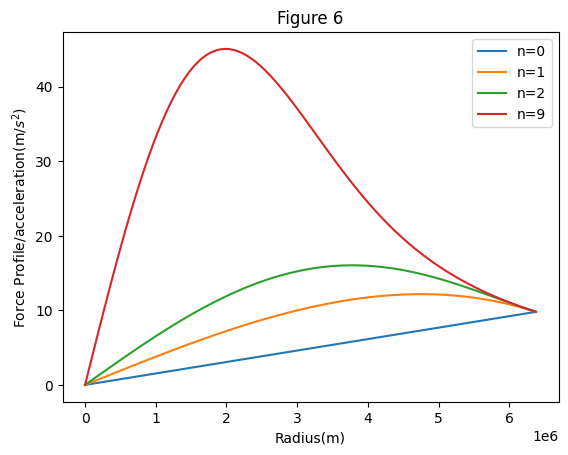

In [97]:
r = np.linspace(1e-10,re,101)

def dm(r,i,R,pn):
    dmdr = 4*np.pi*(r**2)*pn*((1-((r/R)**2))**i)
    return dmdr

def pnv(r,i,R,M):
    pn= [0,0,0,0]
    i = [0,1,2,9]
    for a in [0,1,2,3]:
        M1 = quad(dm,1e-10,re,args=(i[a],R,1))[0]
        pn[a] = me/M1
    return pn

pn1 = pnv(r,n,re,me)

def f(r,G,i,R,pn):
    M = quad(dm,1e-10,r,args=(i,R,pn))[0]
    F = (G/(r**2))*M
    return F

Fn0 = np.zeros_like(r)
fig,ax = plt.subplots()
Fn0 = np.zeros_like(r)
for i in range(len(r)):
    Fn0[i] = f(r[i],G,0,re,pn1[0])
ax.plot(r,Fn0,label="n=0")

Fn1 = np.zeros_like(r)
for i in range(len(r)):
    Fn1[i] = f(r[i],G,1,re,pn1[1])
ax.plot(r,Fn1,label="n=1")

Fn2 = np.zeros_like(r)
for i in range(len(r)):
    Fn2[i] = f(r[i],G,2,re,pn1[2])
ax.plot(r,Fn2,label="n=2")

Fn9 = np.zeros_like(r)
for i in range(len(r)):
    Fn9[i] = f(r[i],G,9,re,pn1[3])
ax.plot(r,Fn9,label="n=9")

ax.legend()  
ax.set_xlabel("Radius(m)")
ax.set_ylabel("Force Profile/acceleration(m/$s^2$)")
ax.set_title("Figure 6")

C:\Users\dudde\AppData\Local\Temp\ipykernel_39568\3003350984.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  fig.legend()
C:\Users\dudde\AppData\Local\Temp\ipykernel_39568\3003350984.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  fig.legend()
C:\Users\dudde\AppData\Local\Temp\ipykernel_39568\3003350984.py:54: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  fig.legend()
C:\Users\dudde\AppData\Local\Temp\ipykernel_39568\3003350984.py:68: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  f

Figure 7


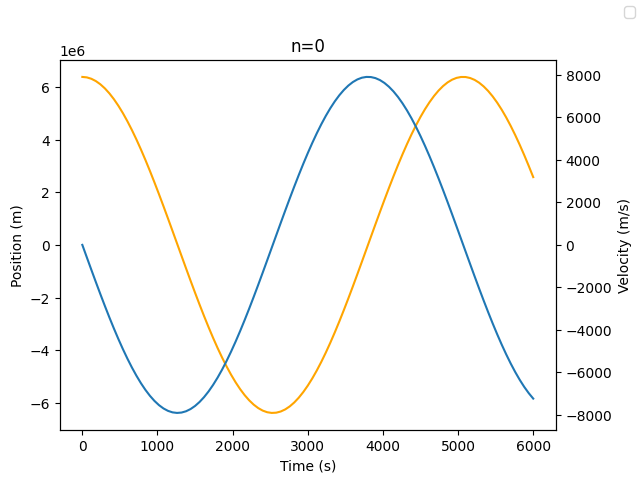

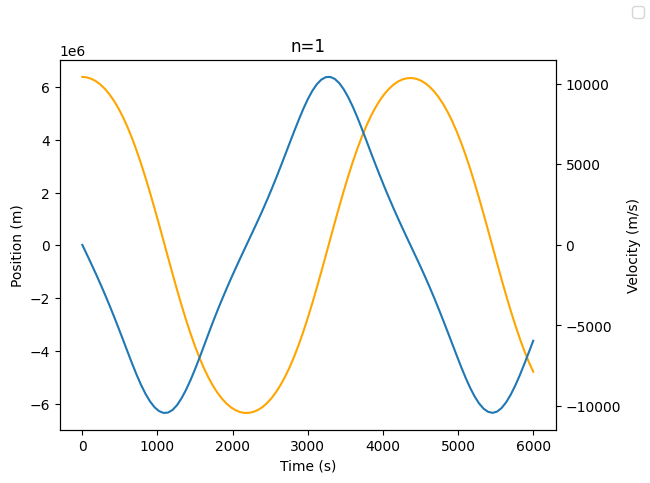

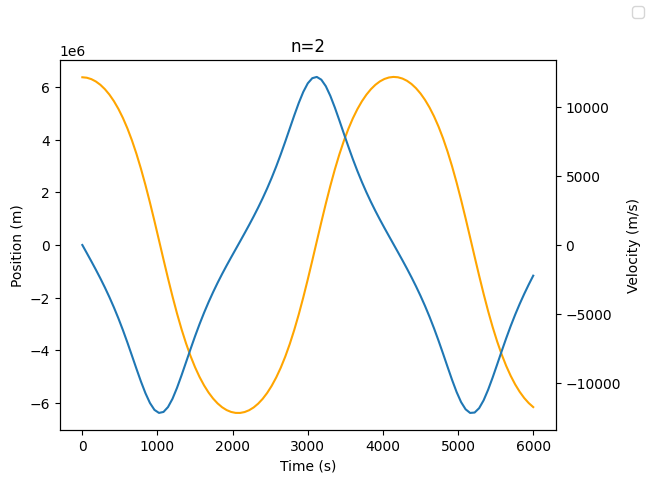

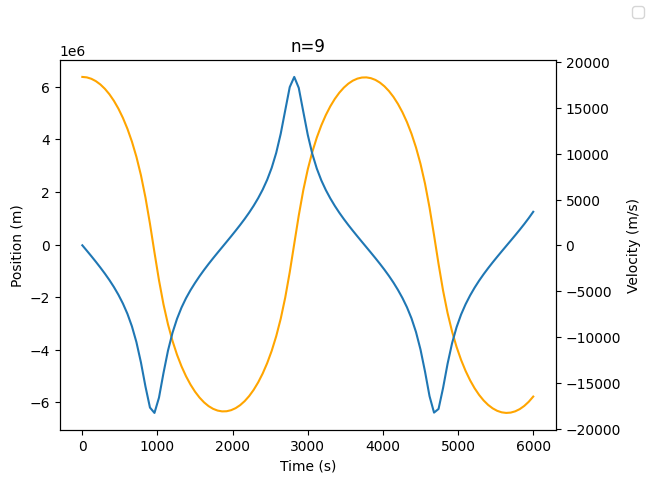

In [104]:
def proj(t,d,G,i,R,pn):
    y,v = d
    M = quad(dm,1e-10,y,args=(i,R,pn))[0]
    dydt = v
    dvdt = -(G/(y**2))*M
    return [dydt,dvdt] 
 
t0 = 0 
tf = 6000
n = 101
t = np.linspace(t0,tf,n)
y0 = re
v0 = 0
def endpoint(t,d,G,i,R,pn):
    y,v = d
    return y
i = [0,1,2,9]

sol0 = solve_ivp(fun = proj, t_span=(t0,tf), y0=[y0,v0], args=(G,i[0],re,pn1[0]),t_eval = t,events=endpoint)
fig,ax = plt.subplots() 
yy,vv = sol0.y 
tt = sol0.t 
ax.plot(tt,yy,'orange') 
ax1 = ax.twinx()
ax1.plot(tt,vv,)
fig.legend()
ax.set_xlabel("Time (s)") 
ax.set_ylabel("Position (m)") 
ax1.set_ylabel("Velocity (m/s)")
ax.set_title("n=0")

#n=1
sol1 = solve_ivp(fun = proj, t_span=(t0,tf), y0=[y0,v0], args=(G,i[1],re,pn1[1]),t_eval = t,events=endpoint)
fig,ax = plt.subplots() 
yy,vv = sol1.y 
tt = sol1.t 
ax.plot(tt,yy,'orange') 
ax1 = ax.twinx()
ax1.plot(tt,vv)
fig.legend()
ax.set_xlabel("Time (s)") 
ax.set_ylabel("Position (m)") 
ax1.set_ylabel("Velocity (m/s)")
ax.set_title("n=1")

#n=2
sol2 = solve_ivp(fun = proj, t_span=(t0,tf), y0=[y0,v0], args=(G,i[2],re,pn1[2]),t_eval = t,events=endpoint)
fig,ax = plt.subplots() 
yy,vv = sol2.y 
tt = sol2.t 
ax.plot(tt,yy,'orange') 
ax1 = ax.twinx()
ax1.plot(tt,vv,)
fig.legend()
ax.set_xlabel("Time (s)") 
ax.set_ylabel("Position (m)") 
ax1.set_ylabel("Velocity (m/s)")
ax.set_title("n=2")

#n=9
sol9 = solve_ivp(fun = proj, t_span=(t0,tf), y0=[y0,v0], args=(G,i[3],re,pn1[3]),t_eval = t,events=endpoint)
fig,ax = plt.subplots() 
yy,vv = sol9.y 
tt = sol9.t 
ax.plot(tt,yy,'orange') 
ax1 = ax.twinx()
ax1.plot(tt,vv)
fig.legend()
ax.set_xlabel("Time (s)") 
ax.set_ylabel("Position (m)") 
ax1.set_ylabel("Velocity (m/s)")
ax.set_title("n=9")
print("Figure 7")

1.6238411532695385
[array([1624.90599197, 4874.11066472])]


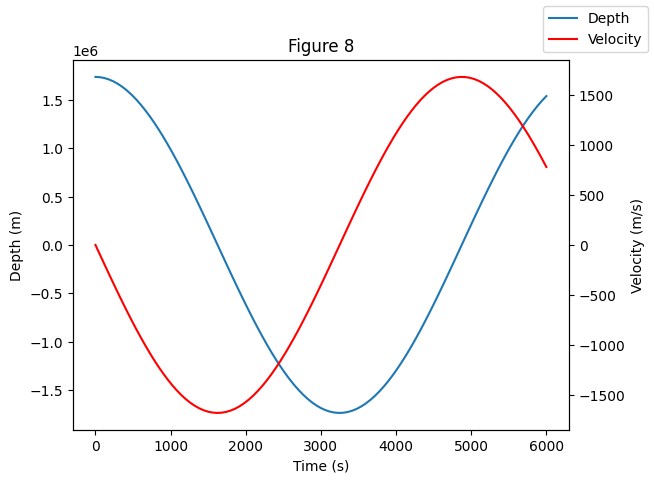

In [ ]:
def dragEq(t,d,a,gv,gamma,Re,y0):
    y,v = d
    dydt = v
    g = (gv*(y/rm)) 
    dvdt = -g+a*(v**gamma)
    return [dydt,dvdt] 

def endpoint(t,d,a,g0,gamma,Re,y0):
    y,v = d
    return y

y0 = rm  
a = 0

tf = 6000
n=101
g = (G * mm)/rm**2
print(g)
t = np.linspace(0,tf,n)
soln = solve_ivp(fun = dragEq, t_span=(0,tf), y0=[y0,0], args=(a,g,2,mm,y0),t_eval = t,events=[endpoint])
y,v = soln.y
t = soln.t 
fig,ax = plt.subplots() 
ax.plot(t,y,label="Depth") 
ax.set_xlabel("Time (s)") 
ax.set_ylabel("Depth (m)") 
ax.set_title("Figure 8") 
ax1 = ax.twinx() 
ax1.plot(t,v,'red',label="Velocity") 
fig.legend() 
print(soln.t_events)
ax1.set_ylabel("Velocity (m/s)")